<a href="https://colab.research.google.com/github/helveticacode/TSP/blob/main/%E5%B7%A1%E5%9B%9E%E3%82%BB%E3%83%BC%E3%83%AB%E3%82%B9%E3%83%9E%E3%83%B3%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#モジュールのimport
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
!pip install simanneal
from simanneal import Annealer
import numpy as np
from scipy.spatial import distance
import random
from google.colab import drive
drive.mount('/content/drive')
from decimal import *
import inspect
import math
import openpyxl
!pip install xlrd
#inspect.getsource(Annealer)
#inspect.getsource(distance)

In [ ]:
# town -> 0 Long->1 Lati ->2
data = pd.read_csv('/content/drive/My Drive/colab/att48.tsp', header=5,dtype={'Longitude': float, 'Latitude': float})
df = data['NODE_COORD_SECTION'].str.split(' ', expand=True)


towns = df.rename(columns={0: 'Town',1: 'Longitude',2: 'Latitude'})
towns = towns.drop(48)
"""for i in range(0,48):
  towns["Longitude"][i] = int(towns["Longitude"][i])
  towns["Latitude"][i] = int(towns["Latitude"][i])"""
towns = towns.astype({'Latitude': float,"Longitude":float})
towns

,Town,Longitude,Latitude
0,1,6734.0,1453.0
1,2,2233.0,10.0
2,3,5530.0,1424.0
3,4,401.0,841.0
4,5,3082.0,1644.0
5,6,7608.0,4458.0
6,7,7573.0,3716.0
7,8,7265.0,1268.0
8,9,6898.0,1885.0
9,10,1112.0,2049.0


In [ ]:
def att_distance(a,b): #aとbの間のatt距離を返す　a = [x_a,y_a] b = [x_b,y_b]
  xd = a[0] - b[0];
  yd = a[1] - b[1];
  def nint(a):
    b = int(a+0.5)
    return b
  rij = math.sqrt( (xd*xd + yd*yd) / 10.0 );
  if tij<rij :
    dij = tij + 1;
  else:
    dij = tij;

  return dij

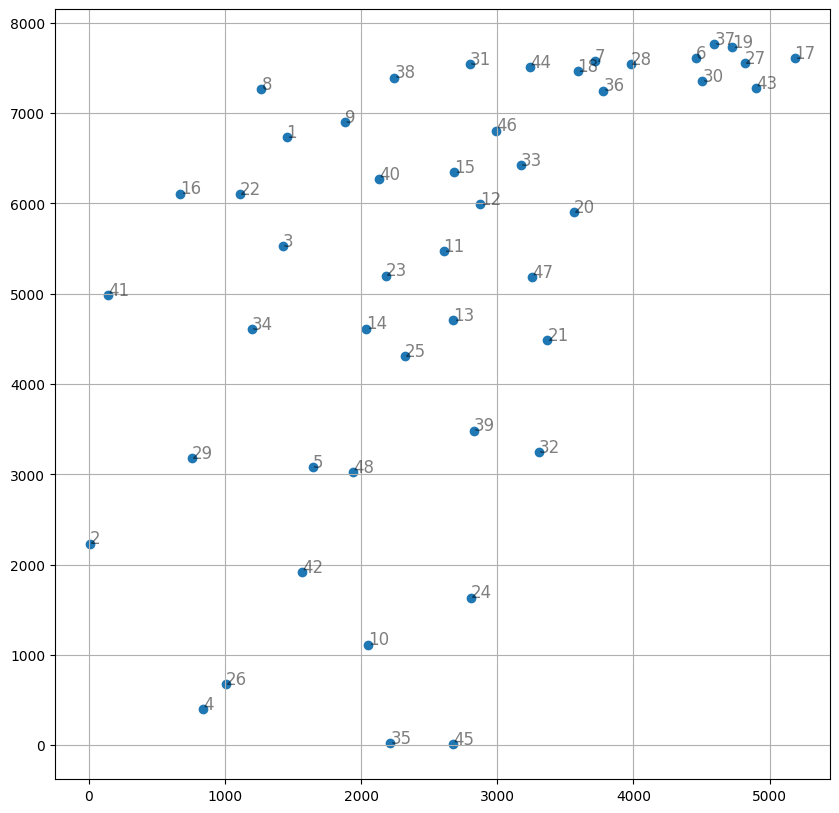

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(towns['Latitude'], towns['Longitude'])
for city, x, y in zip(towns['Town'], towns['Latitude'], towns['Longitude']):
    plt.text(x, y, city, alpha=0.5, size=12)
plt.grid()

In [ ]:

class TravellingSalesmanProblem(Annealer):

    """Test annealer with a travelling salesman problem.
    """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important! 親クラスの__initが使える

    def move(self):


        """Swaps two cities in the route.
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        self.state[a], self.state[b] = self.state[b], self.state[a]
        """
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        if a >= b:
          bsave = b
          b = a
          a = bsave
           #これでa<=bになった
        while a<b:
          self.state[a], self.state[b] = self.state[b], self.state[a]
          a = a+1
          b = b-1
        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e

In [ ]:
mat = towns[['Latitude', 'Longitude']].values
mat

#dist_mat = distance.cdist(mat, mat, metric='euclidean') # ユークリッド距離

array([[1453., 6734.],
       [  10., 2233.],
       [1424., 5530.],
       [ 841.,  401.],
       [1644., 3082.],
       [4458., 7608.],
       [3716., 7573.],
       [1268., 7265.],
       [1885., 6898.],
       [2049., 1112.],
       [2606., 5468.],
       [2873., 5989.],
       [2674., 4706.],
       [2035., 4612.],
       [2683., 6347.],
       [ 669., 6107.],
       [5184., 7611.],
       [3590., 7462.],
       [4723., 7732.],
       [3561., 5900.],
       [3369., 4483.],
       [1110., 6101.],
       [2182., 5199.],
       [2809., 1633.],
       [2322., 4307.],
       [1006.,  675.],
       [4819., 7555.],
       [3981., 7541.],
       [ 756., 3177.],
       [4506., 7352.],
       [2801., 7545.],
       [3305., 3245.],
       [3173., 6426.],
       [1198., 4608.],
       [2216.,   23.],
       [3779., 7248.],
       [4595., 7762.],
       [2244., 7392.],
       [2829., 3484.],
       [2135., 6271.],
       [ 140., 4985.],
       [1569., 1916.],
       [4899., 7280.],
       [323

In [ ]:
distance_matrix = {}
for i, town in enumerate(towns['Town']):
    if town not in distance_matrix.keys():
        distance_matrix[town] = {}
        a =[towns['Longitude'][i],towns['Latitude'][i]]
    for j, town2 in enumerate(towns['Town']):
        b =[towns['Longitude'][j],towns['Latitude'][j]]
        distance_matrix[town][town2] = att_distance(a,b)

def road_energy(road):
  e = 0
  for i in range(len(road)):
    e += distance_matrix[road[i-1]][road[i]]

  return e
#distance_matrix

In [ ]:
states = list(towns['Town'])
init_state = []
len_states = len(states)
start_townname = states[0]
init_state.append(start_townname)

town_keys = []
now_key = 0   #スタート地点のkey
calls = []
for i in range(len_states):
  town_keys.append(i)

town_keys.remove(now_key)
calls.append(now_key)
for _ in range(len_states-1):
  short_distance = 10000000000000000000000000
  """-------find min distance near city--------------"""
  for city in town_keys:
    if city not in calls:
      distance = distance_matrix[towns['Town'][now_key]][towns['Town'][city]]
      if distance < short_distance:
        short_distance = distance
        save_point = city
  """-----------------------"""
  now_key = save_point
  init_state.append(towns['Town'][save_point])
  town_keys.remove(save_point)
  calls.append(save_point)

road_energy(init_state)



12861

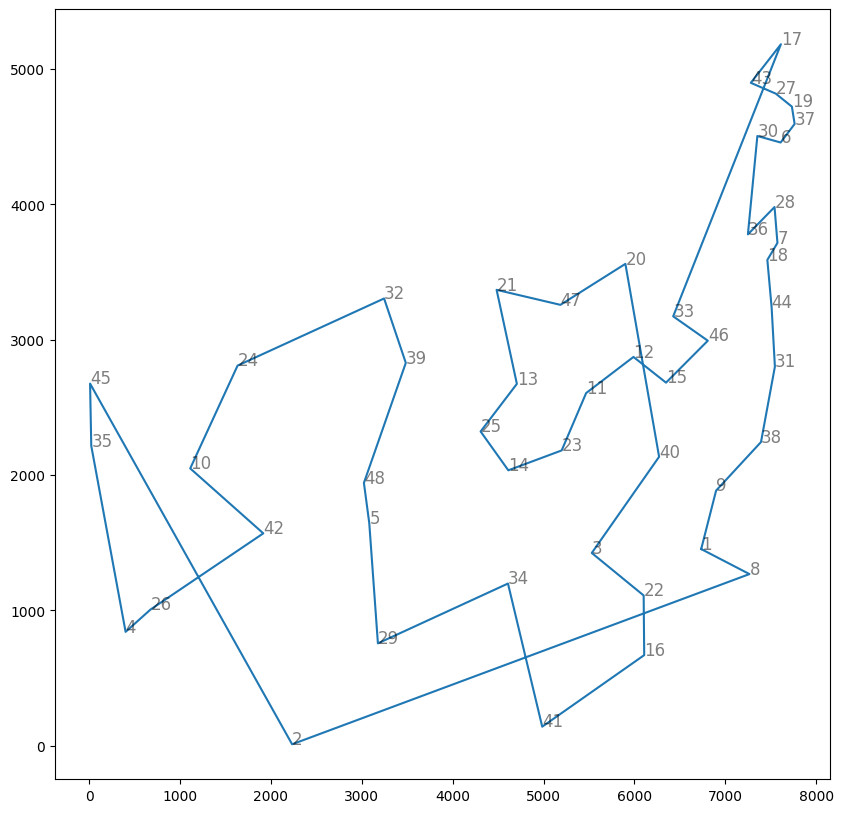

In [ ]:
plt.figure(figsize=(10, 10))
Xs = []
Ys = []
for i in range(len(init_state)):
    Xs.append(list(towns[towns['Town'] == init_state[i]].iloc[:, 2])[0])
    Ys.append(list(towns[towns['Town'] == init_state[i]].iloc[:, 1])[0])

# draw a line that combines start and goal
Xs.append(list(towns[towns['Town'] == init_state[0]].iloc[:, 2])[0])
Ys.append(list(towns[towns['Town'] == init_state[0]].iloc[:, 1])[0])
plt.plot(Ys, Xs)

for city, x, y in zip(towns['Town'], towns['Latitude'], towns['Longitude']):
    plt.text(y, x, city, alpha=0.5, size=12)


In [ ]:
tsp = TravellingSalesmanProblem(init_state, distance_matrix)

tsp.set_schedule(tsp.auto(minutes=0.2))
tsp.copy_strategy = "slice"
state, e = tsp.anneal()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining


In [ ]:
while state[0] != '1':
        state = state[1:] + state[:1]  # rotate NYC to start

print()
print("%i mile route:" % e)
print(" ➞  ".join(state))


10628 mile route:
1 ➞  8 ➞  38 ➞  31 ➞  44 ➞  18 ➞  7 ➞  28 ➞  6 ➞  37 ➞  19 ➞  27 ➞  17 ➞  43 ➞  30 ➞  36 ➞  46 ➞  33 ➞  20 ➞  47 ➞  21 ➞  32 ➞  39 ➞  48 ➞  5 ➞  42 ➞  24 ➞  10 ➞  45 ➞  35 ➞  4 ➞  26 ➞  2 ➞  29 ➞  34 ➞  41 ➞  16 ➞  22 ➞  3 ➞  23 ➞  14 ➞  25 ➞  13 ➞  11 ➞  12 ➞  15 ➞  40 ➞  9


['1', '8', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '21', '32', '39', '48', '5', '42', '24', '10', '45', '35', '4', '26', '2', '29', '34', '41', '16', '22', '3', '23', '14', '25', '13', '11', '12', '15', '40', '9']


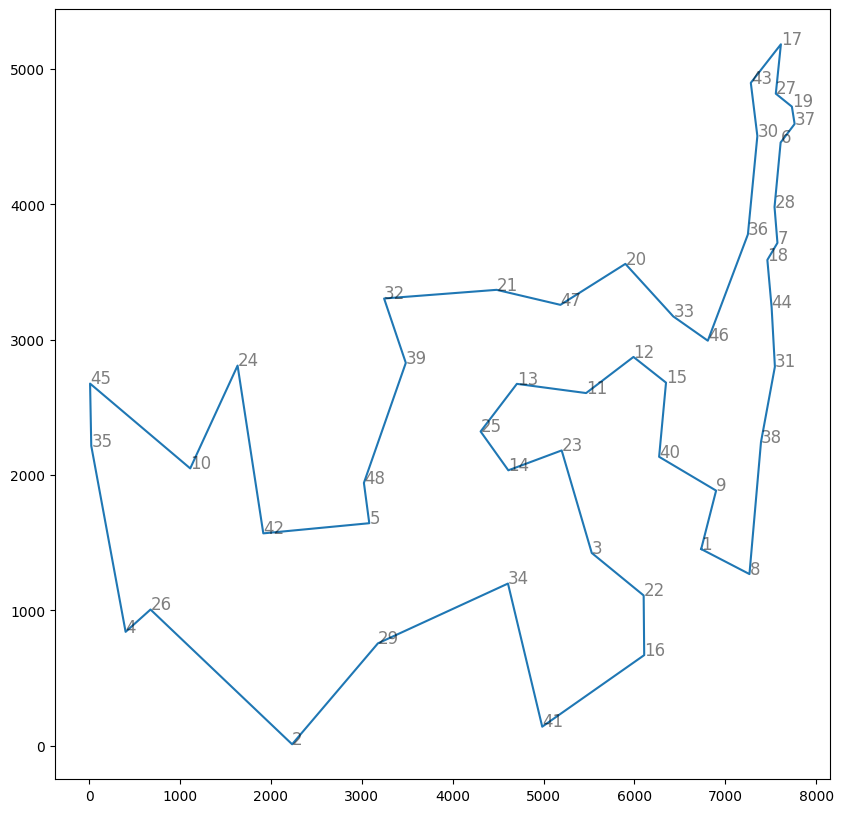

In [ ]:
plt.figure(figsize=(10, 10))
Xs = []
Ys = []
for i in range(len(state)):
    Xs.append(list(towns[towns['Town'] == state[i]].iloc[:, 2])[0])
    Ys.append(list(towns[towns['Town'] == state[i]].iloc[:, 1])[0])
# draw a line that combines start and goal
Xs.append(list(towns[towns['Town'] == state[0]].iloc[:, 2])[0])
Ys.append(list(towns[towns['Town'] == state[0]].iloc[:, 1])[0])
plt.plot(Ys, Xs)
for city, x, y in zip(towns['Town'], towns['Latitude'], towns['Longitude']):
    plt.text(y, x, city, alpha=0.5, size=12)

In [ ]:
print(state)

['1', '8', '38', '31', '44', '18', '7', '28', '6', '37', '19', '27', '17', '43', '30', '36', '46', '33', '20', '47', '21', '32', '39', '48', '5', '42', '24', '10', '45', '35', '4', '26', '2', '29', '34', '41', '16', '22', '3', '23', '14', '25', '13', '11', '12', '15', '40', '9']


In [ ]:
# town -> 0 Long->1 Lati ->2
#date:att532
ideal_route = 27686
data = pd.read_csv('/content/drive/My Drive/colab/att532.tsp', header=5,dtype={'Longitude': float, 'Latitude': float})
df = data['NODE_COORD_SECTION'].str.split(' ', expand=True)
"""X = df[1].values[:-1].astype('int32')
Y = df[2].values[:-1].astype('int32')
XY = X + Y * 1j
num = len(X)"""

towns = df.rename(columns={0: 'Town',1: 'Longitude',2: 'Latitude'})
towns = towns.drop(532)
"""for i in range(0,48):
  towns["Longitude"][i] = int(towns["Longitude"][i])
  towns["Latitude"][i] = int(towns["Latitude"][i])"""
towns = towns.astype({'Latitude': float,"Longitude":float})

def att_distance(a,b): #aとbの間のatt距離を返す　a = [x_a,y_a] b = [x_b,y_b]
  xd = a[0] - b[0];
  yd = a[1] - b[1];
  rij = math.sqrt( (xd*xd + yd*yd) / 10.0 );

  return rij

towns

,Town,Longitude,Latitude
0,1,7810.0,6053.0
1,2,7798.0,5709.0
2,3,7264.0,5575.0
3,4,7324.0,5560.0
4,5,7547.0,5503.0
...,...,...,...
527,528,1961.0,445.0
528,529,1790.0,429.0
529,530,1503.0,362.0
530,531,5393.0,355.0


In [ ]:
def tsp_solve(towns_filename,distance_mesure,ideal_route,move_method = "2-opt",initial_method= "greedy"):


      # town -> 0 Long->1 Lati ->2
  towns_data = pd.read_csv('/content/drive/My Drive/colab/'+towns_filename+'.tsp', header=5,dtype={'Longitude': float, 'Latitude': float})
  df = towns_data['NODE_COORD_SECTION'].str.split(' ', expand=True)

  towns_data = df.rename(columns={0: 'Town',1: 'Longitude',2: 'Latitude'})
  gyo = len(towns_data)


  towns_data = towns_data.astype({'Latitude': float,"Longitude":float})

  for i in range(gyo):
    #print(towns_data['Longitude'][i])
    if math.isnan(towns_data['Longitude'][i]) is True:
          towns_data = towns_data.drop(i)
    elif math.isnan(towns_data['Latitude'][i]) is True:
          towns_data = towns_data.drop(i)


  plt.figure(figsize=(10, 10))
  plt.scatter(towns_data['Latitude'], towns_data['Longitude'])
  for city, x, y in zip(towns_data['Town'], towns_data['Latitude'], towns_data['Longitude']):
      plt.text(x, y, city, alpha=0.5, size=12)
  plt.grid()


  class TravellingSalesmanProblem(Annealer):

      """Test annealer with a travelling salesman problem.
      """

      # pass extra data (the distance matrix) into the constructor
      def __init__(self, state, distance_matrix):
          self.distance_matrix = distance_matrix
          super(TravellingSalesmanProblem, self).__init__(state)  # important! 親クラスの__initが使える

      def move(self):

          if move_method == "2-opt":
            """2-opt"""
            # no efficiency gain, just proof of concept
            # demonstrates returning the delta energy (optional)
            initial_energy = self.energy()

            a = random.randint(0, len(self.state) - 1)
            b = random.randint(0, len(self.state) - 1)
            if a >= b:
              bsave = b
              b = a
              a = bsave
            #これでa<=bになった
            while a<b:
              self.state[a], self.state[b] = self.state[b], self.state[a]
              a = a+1
              b = b-1

            return self.energy() - initial_energy

          elif move_method == "random":
            initial_energy = self.energy()
            a = random.randint(0, len(self.state) - 1)
            b = random.randint(0, len(self.state) - 1)
            self.state[a], self.state[b] = self.state[b], self.state[a]

            return self.energy() - initial_energy

      def energy(self):
          """Calculates the length of the route."""
          e = 0
          for i in range(len(self.state)):
              e += self.distance_matrix[self.state[i-1]][self.state[i]]
          return e



  mat = towns_data[['Latitude', 'Longitude']].values


  #dist_mat = distance.cdist(mat, mat, metric='euclidean') # ユークリッド距離

  distance_matrix = {}
  for i, town in enumerate(towns_data['Town']):
      if town not in distance_matrix.keys():
          distance_matrix[town] = {}
          a =[towns_data['Longitude'][i],towns_data['Latitude'][i]]
      for j, town2 in enumerate(towns_data['Town']):
          b =[towns_data['Longitude'][j],towns_data['Latitude'][j]]
          distance_matrix[town][town2] = distance_mesure(a,b)
  """
  init_state = list(_data['Town'])
  random.shuffle(init_state)
  """

  states = list(towns_data['Town'])
  init_state = []

  def initial_energy(state):
      """Calculates the length of the route."""
      e = 0
      for i in range(len(state)):
          e += distance_matrix[state[i-1]][state[i]]
      return e

  if initial_method == "greedy":

    len_states = len(states)
    start_townname = states[0]
    init_state.append(start_townname)

    town_keys = []
    now_key = 0   #スタート地点のkey
    calls = []
    for i in range(len_states):
      town_keys.append(i)

    town_keys.remove(now_key)
    calls.append(now_key)
    for _ in range(len_states-1):
      short_distance = 10000000000000000000000000
      """-------find min distance near city--------------"""
      for city in town_keys:
        if city not in calls:
          distance = distance_matrix[towns_data['Town'][now_key]][towns_data['Town'][city]]
          if distance < short_distance:
            short_distance = distance
            save_point = city
      """-----------------------"""
      now_key = save_point
      init_state.append(towns_data['Town'][save_point])
      town_keys.remove(save_point)
      calls.append(save_point)

  if initial_method == "random":
    random.shuffle(init_state)

  plt.figure(figsize=(10, 10))
  Xs = []
  Ys = []
  for i in range(len(init_state)):
      Xs.append(list(towns_data[towns_data['Town'] == init_state[i]].iloc[:, 2])[0])
      Ys.append(list(towns_data[towns_data['Town'] == init_state[i]].iloc[:, 1])[0])
  Xs.append(list(towns_data[towns_data['Town'] == init_state[0]].iloc[:, 2])[0])
  Ys.append(list(towns_data[towns_data['Town'] == init_state[0]].iloc[:, 1])[0])

  plt.plot(Ys, Xs)
  for city, x, y in zip(towns_data['Town'], towns_data['Latitude'], towns_data['Longitude']):
      plt.text(y, x, city, alpha=0.5, size=12)

  initial_e = initial_energy(init_state)
  print("initial energy is "+str(initial_e))
  #distance_matrix

  tsp = TravellingSalesmanProblem(init_state, distance_matrix)

  tsp.set_schedule(tsp.auto(minutes=0.2))
  tsp.copy_strategy = "slice"
  state, e = tsp.anneal()

  while state[0] != '1':
          state = state[1:] + state[:1]  # rotate NYC to start

  print()
  print("%i mile route:" % e)
  print(" ➞  ".join(state))
  mistake = e*100/ideal_route - 100
  print("mistake is"+str(mistake))

  plt.figure(figsize=(10, 10))
  Xs = []
  Ys = []
  for i in range(len(state)):
      Xs.append(list(towns_data[towns_data['Town'] == state[i]].iloc[:, 2])[0])
      Ys.append(list(towns_data[towns_data['Town'] == state[i]].iloc[:, 1])[0])
  Xs.append(list(towns_data[towns_data['Town'] == state[0]].iloc[:, 2])[0])
  Ys.append(list(towns_data[towns_data['Town'] == state[0]].iloc[:, 1])[0])
  plt.plot(Ys, Xs)
  for city, x, y in zip(towns_data['Town'], towns_data['Latitude'], towns_data['Longitude']):
      plt.text(y, x, city, alpha=0.5, size=12)

  print("energy of the anneal route is "+str(e)+", energy of the initial route is "+str(initial_e))

  initial_route = initial_e
  result = e
  return [towns_filename,ideal_route,distance_mesure.__name__,move_method,initial_method,initial_route,result]

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


initial energy is 12861


 Temperature        Energy    Accept   Improve     Elapsed   Remaining



10711 mile route:
1 ➞  16 ➞  22 ➞  3 ➞  34 ➞  41 ➞  29 ➞  2 ➞  26 ➞  4 ➞  35 ➞  45 ➞  10 ➞  24 ➞  42 ➞  5 ➞  48 ➞  39 ➞  32 ➞  21 ➞  47 ➞  13 ➞  25 ➞  14 ➞  23 ➞  11 ➞  40 ➞  15 ➞  12 ➞  20 ➞  33 ➞  46 ➞  36 ➞  30 ➞  43 ➞  17 ➞  27 ➞  19 ➞  37 ➞  6 ➞  28 ➞  7 ➞  18 ➞  44 ➞  31 ➞  38 ➞  9 ➞  8
mistake is0.7809559653744884
energy of the anneal route is 10711, energy of the initial route is 12861


['att48', 10628, 'att_distance', '2-opt', 'greedy', 12861, 10711]

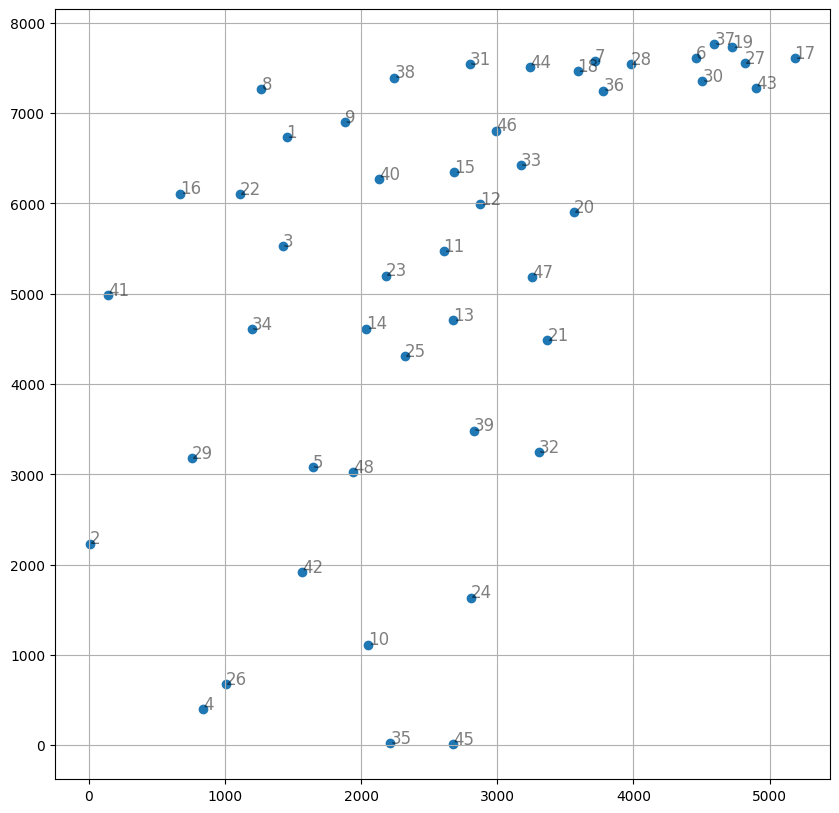

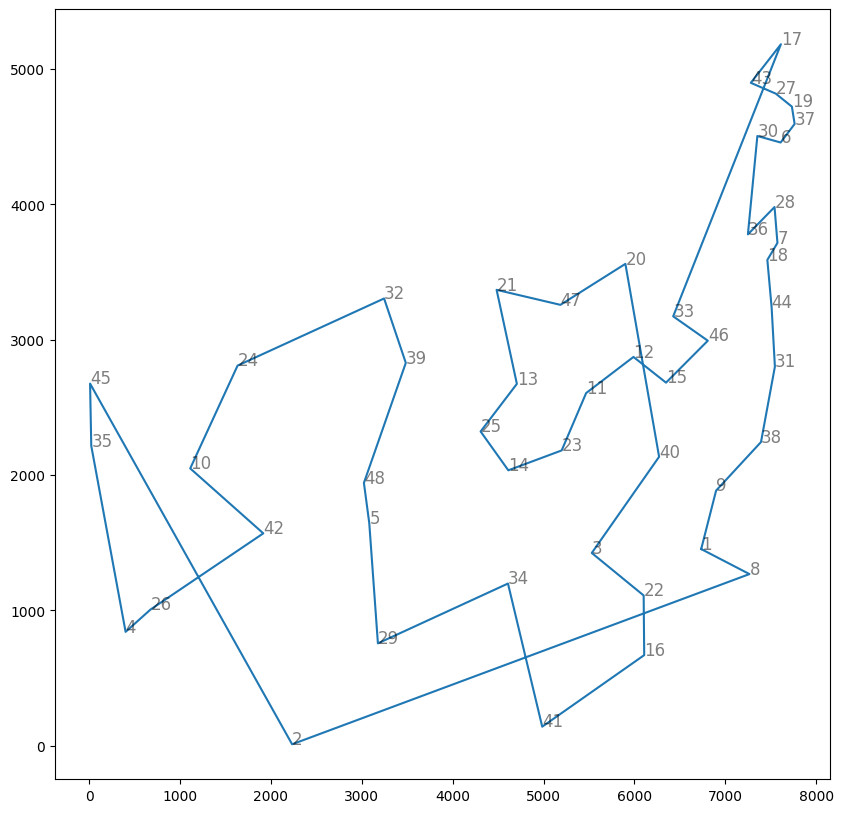

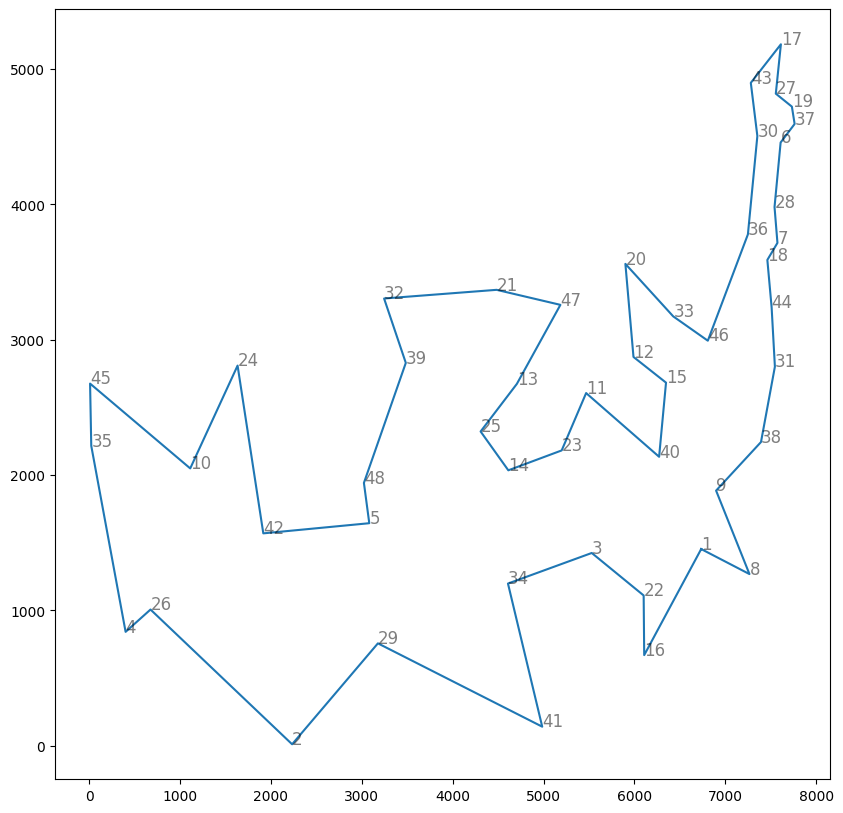

In [ ]:
tsp_solve('att48',att_distance,10628,move_method = "2-opt",initial_method= "greedy")

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining



36920 mile route:
1 ➞  2 ➞  6 ➞  7 ➞  8 ➞  9 ➞  11 ➞  12 ➞  10 ➞  13 ➞  14 ➞  18 ➞  15 ➞  17 ➞  23 ➞  20 ➞  25 ➞  29 ➞  32 ➞  30 ➞  33 ➞  34 ➞  35 ➞  42 ➞  55 ➞  57 ➞  45 ➞  37 ➞  47 ➞  51 ➞  52 ➞  53 ➞  59 ➞  63 ➞  65 ➞  60 ➞  74 ➞  83 ➞  112 ➞  130 ➞  133 ➞  115 ➞  126 ➞  114 ➞  113 ➞  108 ➞  104 ➞  100 ➞  94 ➞  93 ➞  82 ➞  81 ➞  90 ➞  125 ➞  138 ➞  149 ➞  153 ➞  180 ➞  158 ➞  178 ➞  231 ➞  280 ➞  255 ➞  237 ➞  221 ➞  210 ➞  218 ➞  191 ➞  189 ➞  148 ➞  155 ➞  185 ➞  196 ➞  186 ➞  211 ➞  197 ➞  219 ➞  230 ➞  260 ➞  262 ➞  252 ➞  259 ➞  236 ➞  225 ➞  203 ➞  216 ➞  242 ➞  272 ➞  264 ➞  288 ➞  269 ➞  263 ➞  276 ➞  291 ➞  306 ➞  310 ➞  342 ➞  358 ➞  381 ➞  373 ➞  387 ➞  403 ➞  414 ➞  415 ➞  413 ➞  416 ➞  425 ➞  438 ➞  436 ➞  439 ➞  444 ➞  453 ➞  460 ➞  451 ➞  448 ➞  434 ➞  429 ➞  409 ➞  399 ➞  408 ➞  397 ➞  404 ➞  405 ➞  402 ➞  423 ➞  420 ➞  417 ➞  437 ➞  430 ➞  427 ➞  424 ➞  426 ➞  391 ➞  388 ➞  382 ➞  368 ➞  362 ➞  351 ➞  338 ➞  322 ➞  315 ➞  309 ➞  283 ➞  323 ➞  333 ➞  346 ➞  325 ➞  3

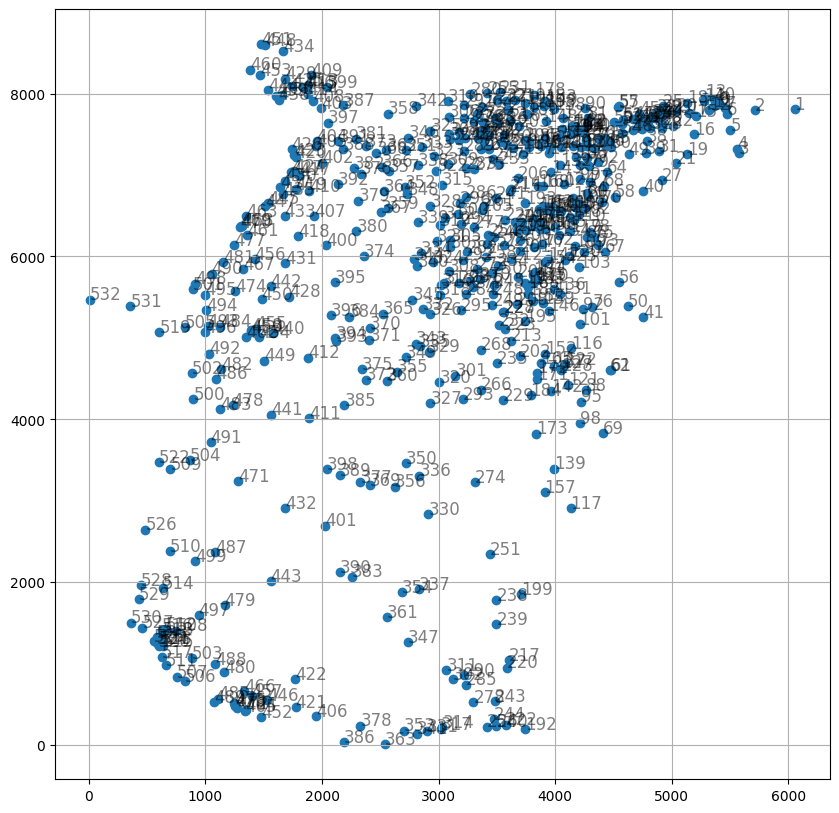

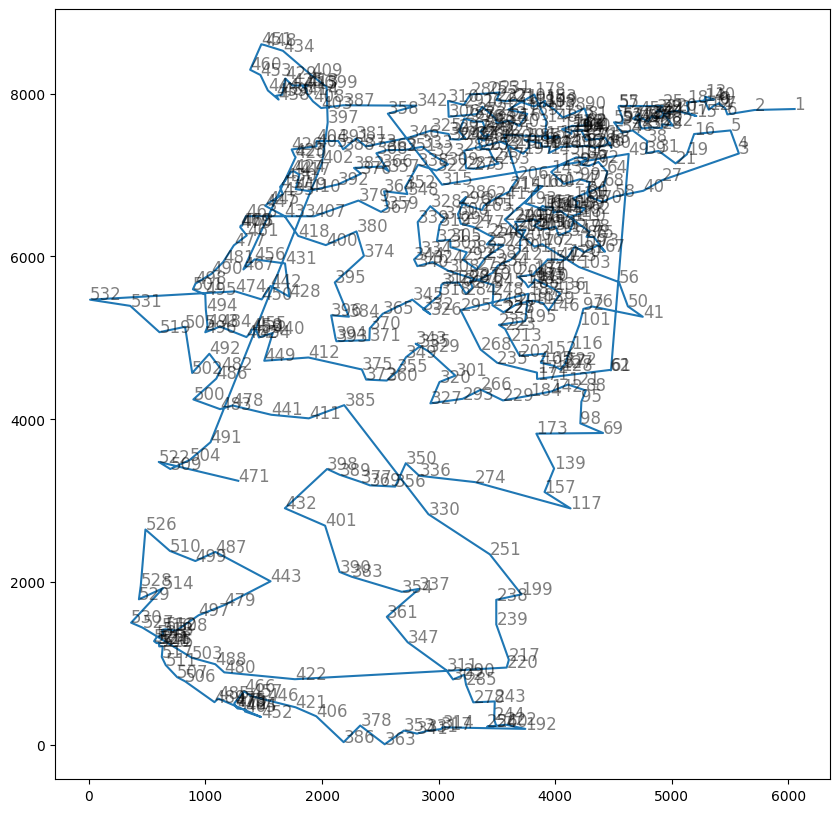

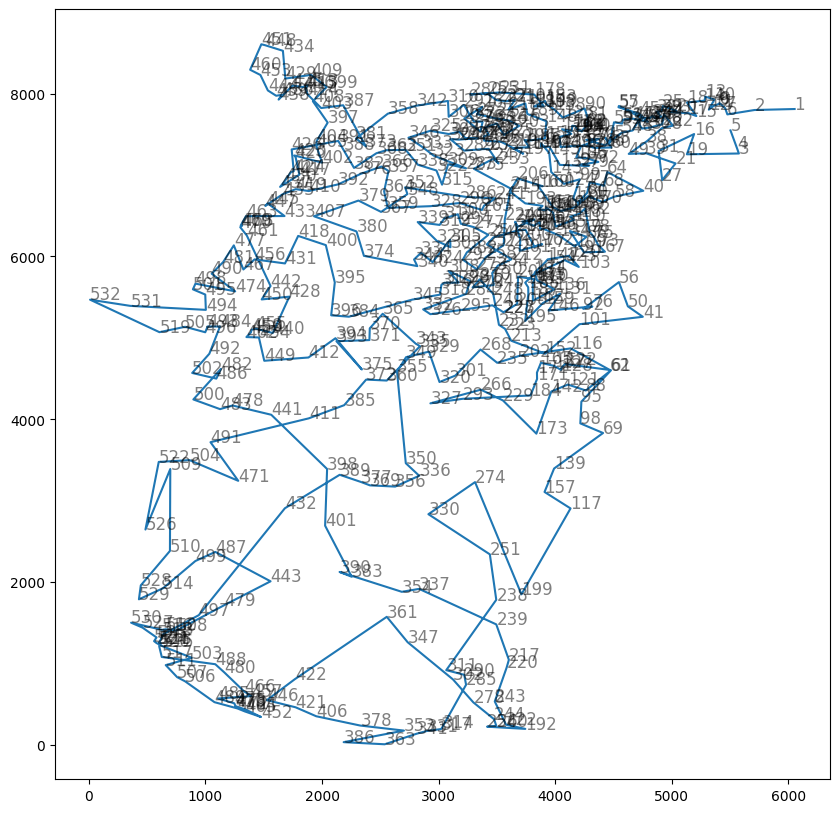

In [ ]:


%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.scatter(towns['Latitude'], towns['Longitude'])
for city, x, y in zip(towns['Town'], towns['Latitude'], towns['Longitude']):
    plt.text(x, y, city, alpha=0.5, size=12)
plt.grid()


class TravellingSalesmanProblem(Annealer):

    """Test annealer with a travelling salesman problem.
    """

    # pass extra data (the distance matrix) into the constructor
    def __init__(self, state, distance_matrix):
        self.distance_matrix = distance_matrix
        super(TravellingSalesmanProblem, self).__init__(state)  # important! 親クラスの__initが使える

    def move(self):
        """2-opt"""
        # no efficiency gain, just proof of concept
        # demonstrates returning the delta energy (optional)
        initial_energy = self.energy()

        a = random.randint(0, len(self.state) - 1)
        b = random.randint(0, len(self.state) - 1)
        if a >= b:
          bsave = b
          b = a
          a = bsave
        #これでa<=bになった
        while a<b:
          self.state[a], self.state[b] = self.state[b], self.state[a]
          a = a+1
          b = b-1

        return self.energy() - initial_energy

    def energy(self):
        """Calculates the length of the route."""
        e = 0
        for i in range(len(self.state)):
            e += self.distance_matrix[self.state[i-1]][self.state[i]]
        return e

def init_energy(self):
    """Calculates the length of the route."""
    e = 0
    for i in range(len(state)):
      e += distance_matrix[state[i-1]][state[i]]
    return e

mat = towns[['Latitude', 'Longitude']].values
mat

#dist_mat = distance.cdist(mat, mat, metric='euclidean') # ユークリッド距離

distance_matrix = {}
for i, town in enumerate(towns['Town']):
    if town not in distance_matrix.keys():
        distance_matrix[town] = {}
        a =[towns['Longitude'][i],towns['Latitude'][i]]
    for j, town2 in enumerate(towns['Town']):
        b =[towns['Longitude'][j],towns['Latitude'][j]]
        distance_matrix[town][town2] = att_distance(a,b)
"""
init_state = list(towns['Town'])
random.shuffle(init_state)
"""
states = list(towns['Town'])
init_state = []
len_states = len(states)
start_townname = states[0]
init_state.append(start_townname)

town_keys = []
now_key = 0   #スタート地点のkey
calls = []

for i in range(len_states):
  town_keys.append(i)

town_keys.remove(now_key)
calls.append(now_key)
for _ in range(len_states-1):
  short_distance = 10000000000000000000000000
  """-------find min distance near city--------------"""
  for city in town_keys:
    if city not in calls:
      distance = distance_matrix[towns['Town'][now_key]][towns['Town'][city]]
      if distance < short_distance:
        short_distance = distance
        save_point = city
  """-----------------------"""
  now_key = save_point
  init_state.append(towns['Town'][save_point])
  town_keys.remove(save_point)
  calls.append(save_point)

plt.figure(figsize=(10, 10))
Xs = []
Ys = []
for i in range(len(init_state)):
    Xs.append(list(towns[towns['Town'] == init_state[i]].iloc[:, 2])[0])
    Ys.append(list(towns[towns['Town'] == init_state[i]].iloc[:, 1])[0])

plt.plot(Xs, Ys)
for city, x, y in zip(towns['Town'], towns['Latitude'], towns['Longitude']):
    plt.text(x, y, city, alpha=0.5, size=12)
#distance_matrix

tsp = TravellingSalesmanProblem(init_state, distance_matrix)

tsp.set_schedule(tsp.auto(minutes=0.2))
tsp.copy_strategy = "slice"
state, e = tsp.anneal()

while state[0] != '1':
        state = state[1:] + state[:1]  # rotate NYC to start

print()
print("%i mile route:" % e)
print(" ➞  ".join(state))
mistake = e*100/ideal_route - 100
print("mistake is"+str(mistake))

plt.figure(figsize=(10, 10))
Xs = []
Ys = []
for i in range(len(state)):
    Xs.append(list(towns[towns['Town'] == state[i]].iloc[:, 2])[0])
    Ys.append(list(towns[towns['Town'] == state[i]].iloc[:, 1])[0])

plt.plot(Xs, Ys)
for city, x, y in zip(towns['Town'], towns['Latitude'], towns['Longitude']):
    plt.text(x, y, city, alpha=0.5, size=12)




 Temperature        Energy    Accept   Improve     Elapsed   Remaining


initial energy is 12815.579595292678


 Temperature        Energy    Accept   Improve     Elapsed   Remaining



10919 mile route:
1 ➞  22 ➞  16 ➞  41 ➞  34 ➞  3 ➞  40 ➞  15 ➞  12 ➞  11 ➞  23 ➞  14 ➞  29 ➞  2 ➞  26 ➞  4 ➞  35 ➞  45 ➞  10 ➞  24 ➞  42 ➞  5 ➞  48 ➞  32 ➞  39 ➞  25 ➞  13 ➞  21 ➞  47 ➞  20 ➞  33 ➞  46 ➞  36 ➞  30 ➞  43 ➞  17 ➞  27 ➞  19 ➞  37 ➞  6 ➞  28 ➞  7 ➞  18 ➞  44 ➞  31 ➞  38 ➞  9 ➞  8
mistake is2.7396273257418784
energy of the anneal route is 10919.167592179847, energy of the initial route is 12815.579595292678


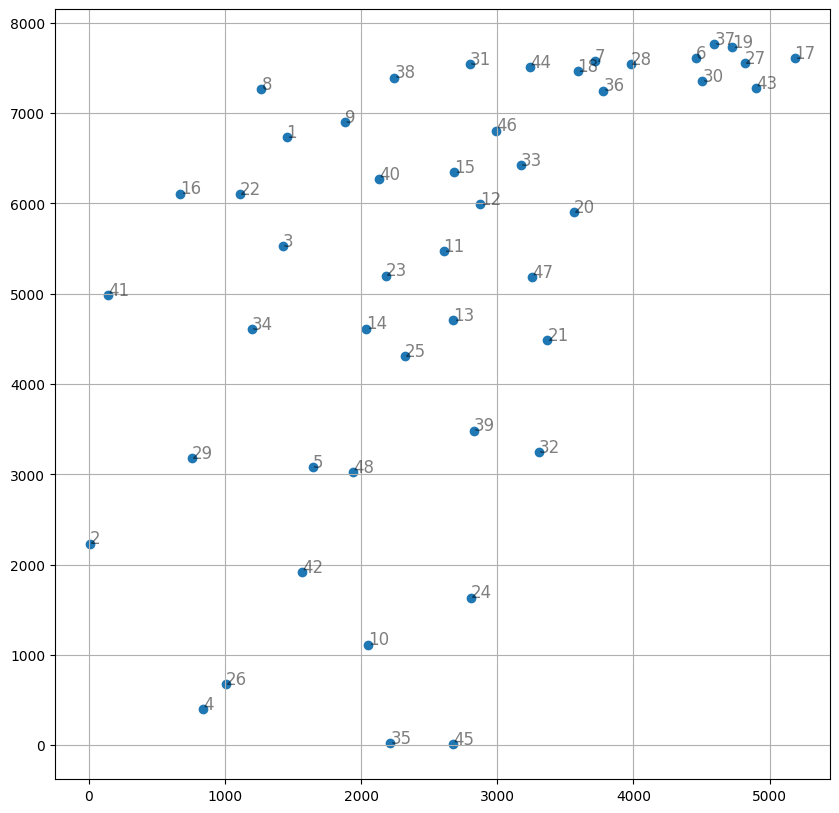

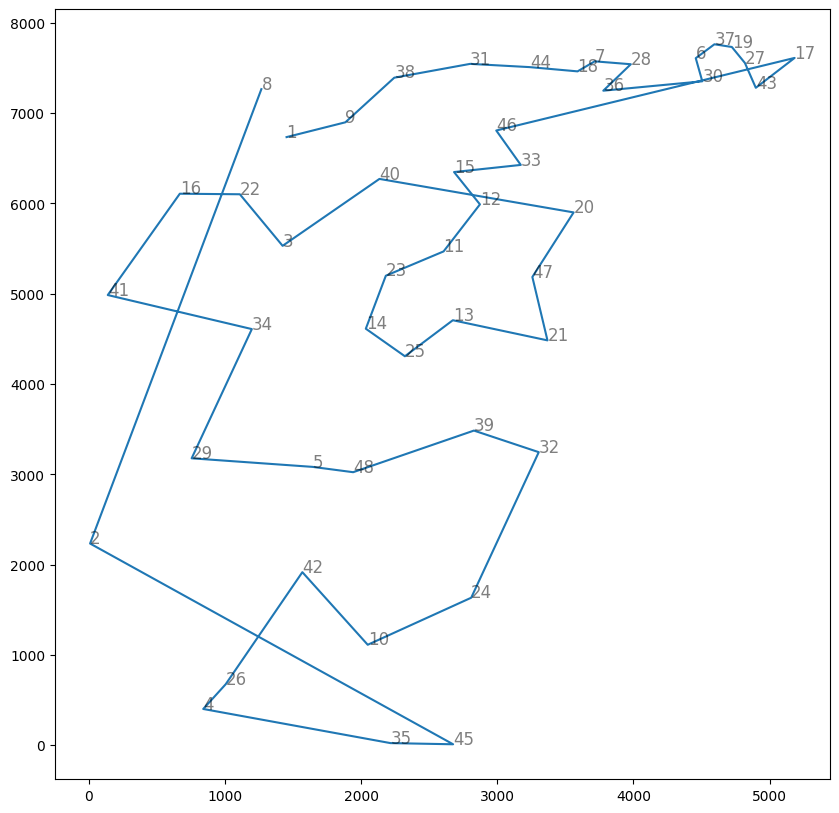

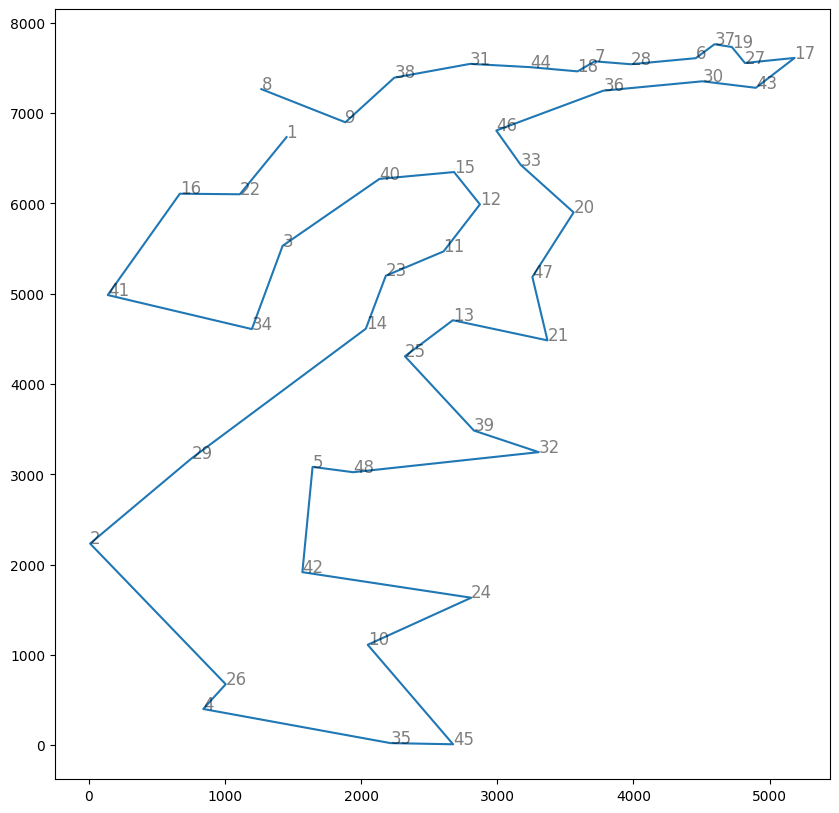

In [ ]:
tsp_solve('att48',att_distance,10628,move_method = "2-opt",initial_method= "greedy")

In [ ]:
    # town -> 0 Long->1 Lati ->2
towns_filename = "att48"
towns_data = pd.read_csv('/content/drive/My Drive/colab/'+towns_filename+'.tsp', header=5,dtype={'Longitude': float, 'Latitude': float})
df = towns_data['NODE_COORD_SECTION'].str.split(' ', expand=True)

towns_data = df.rename(columns={0: 'Town',1: 'Longitude',2: 'Latitude'})
gyo = len(towns_data)


towns_data = towns_data.astype({'Latitude': float,"Longitude":float})

for i in range(gyo):
  #print(towns_data['Longitude'][i])
  if math.isnan(towns_data['Longitude'][i]) is True:
        towns_data = towns_data.drop(i)
  elif math.isnan(towns_data['Latitude'][i]) is True:
        towns_data = towns_data.drop(i)

"""plt.figure(figsize=(10, 10))
plt.scatter(towns_data['Latitude'], towns_data['Longitude'])
for city, x, y in zip(towns_data['Town'], towns_data['Latitude'], towns_data['Longitude']):
  plt.text(x, y, city, alpha=0.5, size=12)
plt.grid()
"""
towns_data


,Town,Longitude,Latitude
0,1,6734.0,1453.0
1,2,2233.0,10.0
2,3,5530.0,1424.0
3,4,401.0,841.0
4,5,3082.0,1644.0
5,6,7608.0,4458.0
6,7,7573.0,3716.0
7,8,7265.0,1268.0
8,9,6898.0,1885.0
9,10,1112.0,2049.0


 Temperature        Energy    Accept   Improve     Elapsed   Remaining


initial energy is 12815.579595292678


 Temperature        Energy    Accept   Improve     Elapsed   Remaining



10753 mile route:
1 ➞  8 ➞  9 ➞  38 ➞  31 ➞  44 ➞  18 ➞  7 ➞  28 ➞  6 ➞  37 ➞  19 ➞  27 ➞  17 ➞  43 ➞  30 ➞  36 ➞  46 ➞  33 ➞  20 ➞  12 ➞  15 ➞  40 ➞  3 ➞  11 ➞  23 ➞  14 ➞  25 ➞  13 ➞  47 ➞  21 ➞  32 ➞  39 ➞  48 ➞  5 ➞  42 ➞  24 ➞  10 ➞  45 ➞  35 ➞  4 ➞  26 ➞  2 ➞  29 ➞  34 ➞  41 ➞  16 ➞  22
mistake is1.1848158148383874
energy of the anneal route is 10753.922224801025, energy of the initial route is 12815.579595292678


"\nfor j in range(1):\n  wb = openpyxl.load_workbook('/content/drive/My Drive/colab/tsp_results.xlsx')\n  ws = wb.active\n  idx = ws.max_row\n\n  ws.append(results)\n\n  wb.save('/content/drive/My Drive/colab/tsp_results.xlsx')\n  wb.close()"

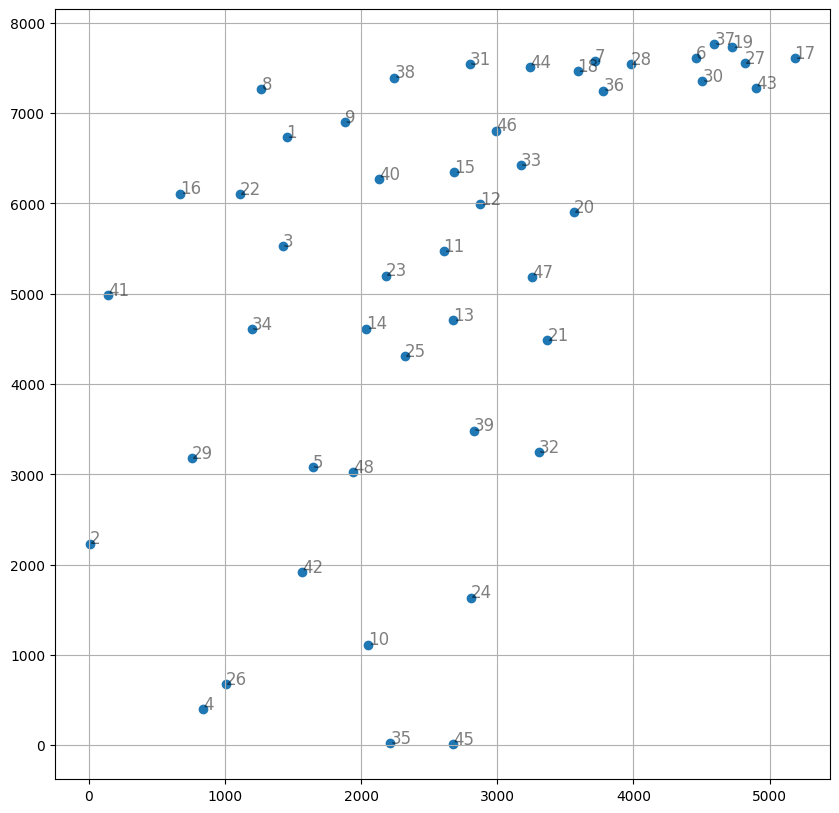

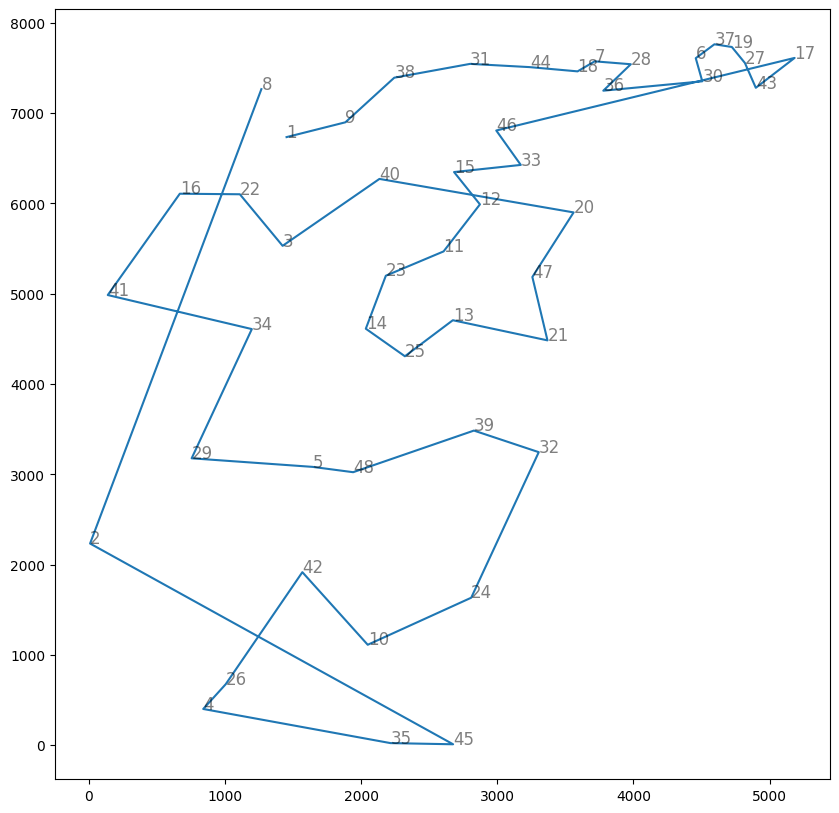

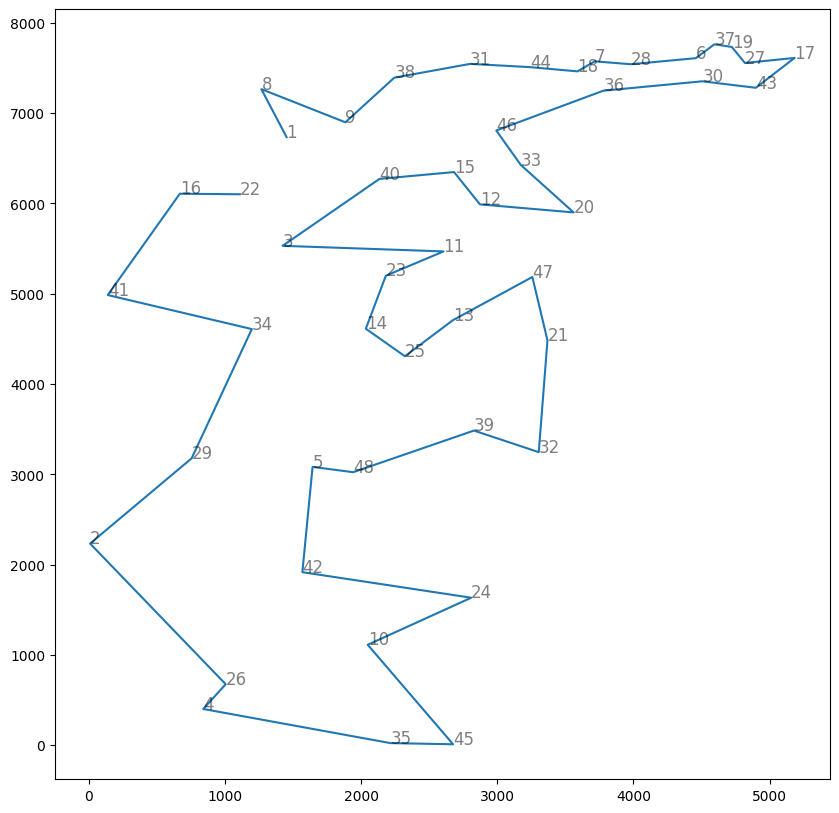

In [ ]:



results = tsp_solve('att48',att_distance,10628,move_method = "2-opt",initial_method= "greedy")
"""
for j in range(1):
  wb = openpyxl.load_workbook('/content/drive/My Drive/colab/tsp_results.xlsx')
  ws = wb.active
  idx = ws.max_row

  ws.append(results)

  wb.save('/content/drive/My Drive/colab/tsp_results.xlsx')
  wb.close()"""

In [ ]:
def tsp_save(results_list,save_space):


  wb = openpyxl.load_workbook('/content/drive/My Drive/colab/'+save_space+'.xlsx')
  ws = wb.active
  i = 2
  while ws.cell(row = i,column = 1).value is not None:
    i += 1
  for j in range(8):
    ws.cell(row = i,column = j+1).value = results_list[j]

  wb.save('/content/drive/My Drive/colab/tsp_results.xlsx')



 Temperature        Energy    Accept   Improve     Elapsed   Remaining


initial energy is 12815.579595292678


 Temperature        Energy    Accept   Improve     Elapsed   Remaining



10838 mile route:
1 ➞  8 ➞  38 ➞  31 ➞  44 ➞  18 ➞  7 ➞  28 ➞  6 ➞  37 ➞  19 ➞  27 ➞  17 ➞  43 ➞  30 ➞  36 ➞  46 ➞  33 ➞  20 ➞  47 ➞  21 ➞  13 ➞  14 ➞  25 ➞  39 ➞  32 ➞  48 ➞  5 ➞  24 ➞  45 ➞  35 ➞  4 ➞  26 ➞  10 ➞  42 ➞  2 ➞  29 ➞  34 ➞  41 ➞  16 ➞  22 ➞  3 ➞  23 ➞  11 ➞  12 ➞  15 ➞  40 ➞  9
mistake is1.9817951478314342
energy of the anneal route is 10838.625188311524, energy of the initial route is 12815.579595292678


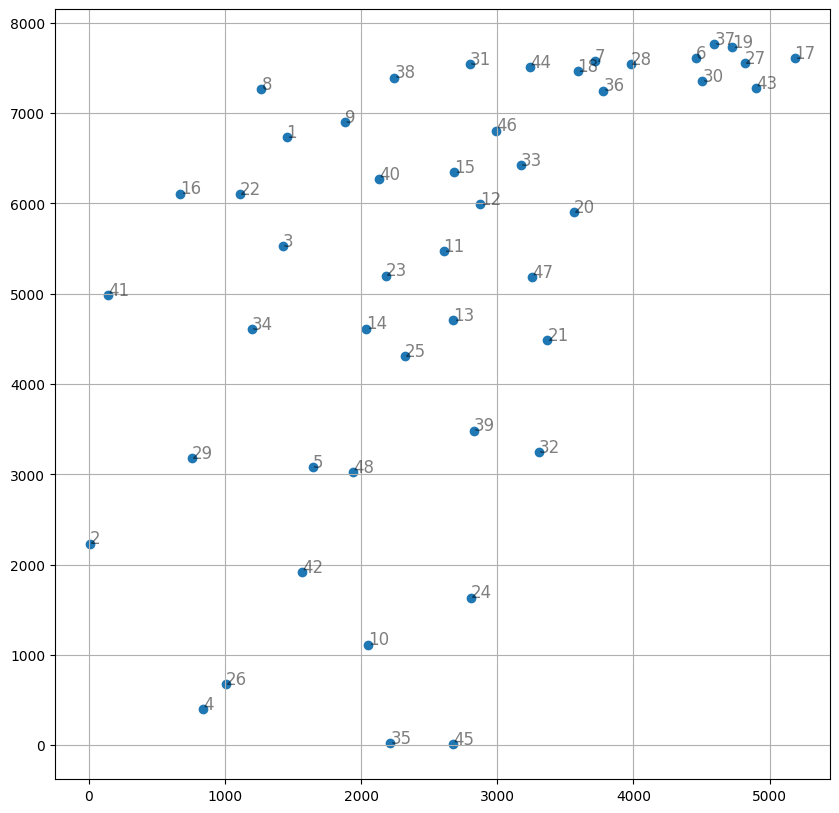

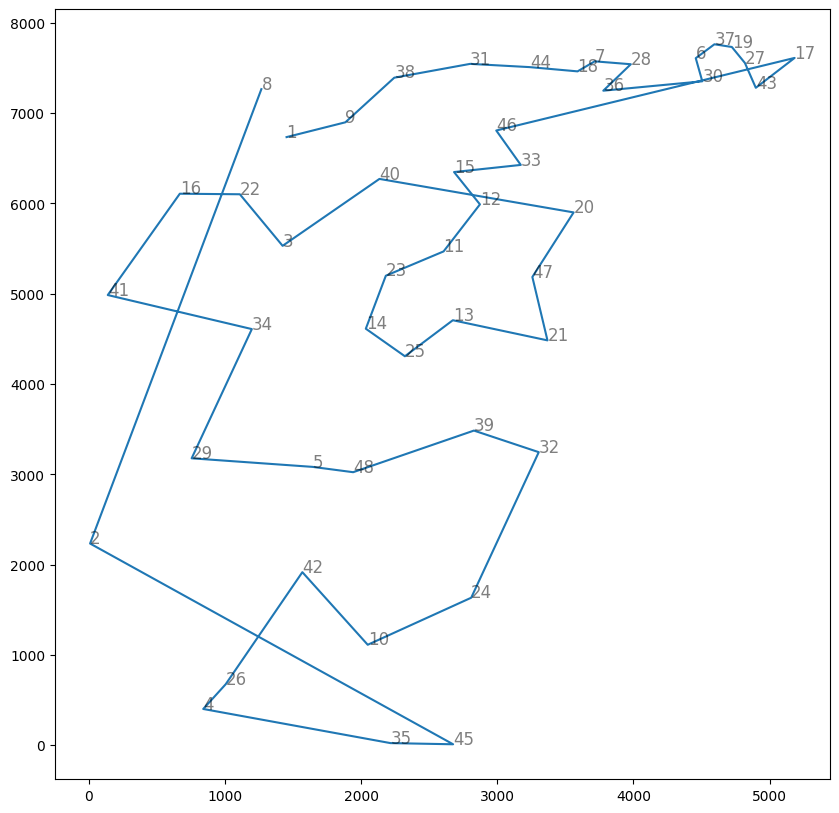

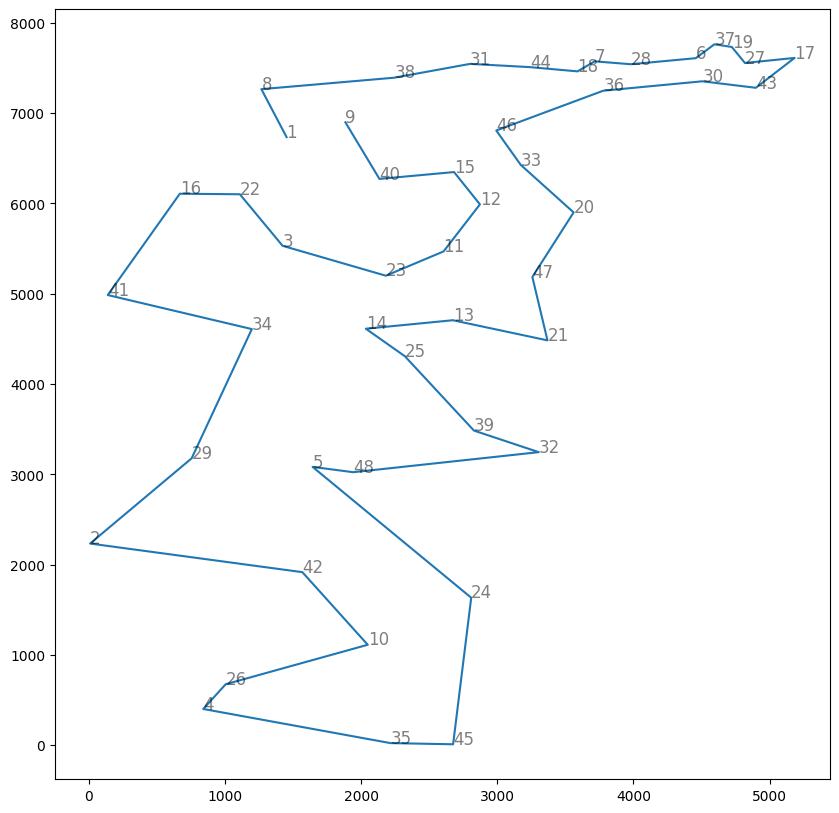

In [ ]:
results = tsp_solve('att48',att_distance,10628,move_method = "2-opt",initial_method= "greedy")
tsp_save(results,'tsp_results')

In [ ]:
def tsp_solve(towns_filename,distance_mesure,ideal_route,move_method = "2-opt",initial_method= "greedy",grid = "off",copy_method = "deepcopy"):


      # town -> 0 Long->1 Lati ->2
  towns_data = pd.read_csv('/content/drive/My Drive/colab/'+towns_filename+'.tsp', header=5,dtype={'Longitude': float, 'Latitude': float})
  df = towns_data['NODE_COORD_SECTION'].str.split(' ', expand=True)

  towns_data = df.rename(columns={0: 'Town',1: 'Longitude',2: 'Latitude'})
  gyo = len(towns_data)


  towns_data = towns_data.astype({'Latitude': float,"Longitude":float})

  for i in range(gyo):
    #print(towns_data['Longitude'][i])
    if math.isnan(towns_data['Longitude'][i]) is True:
          towns_data = towns_data.drop(i)
    elif math.isnan(towns_data['Latitude'][i]) is True:
          towns_data = towns_data.drop(i)

  if grid == "on":

    plt.figure(figsize=(10, 10))
    plt.scatter(towns_data['Longitude'], towns_data['Latitude'])
    for city, x, y in zip(towns_data['Town'], towns_data['Latitude'], towns_data['Longitude']):
        plt.text(y,x, city, alpha=0.5, size=12)
    plt.grid()


  class TravellingSalesmanProblem(Annealer):

      """Test annealer with a travelling salesman problem.
      """

      # pass extra data (the distance matrix) into the constructor
      def __init__(self, state, distance_matrix):
          self.distance_matrix = distance_matrix
          super(TravellingSalesmanProblem, self).__init__(state)  # important! 親クラスの__initが使える

      def move(self):

          if move_method == "2-opt":
            """2-opt"""
            # no efficiency gain, just proof of concept
            # demonstrates returning the delta energy (optional)
            initial_energy = self.energy()

            a = random.randint(0, len(self.state) - 1)
            b = random.randint(0, len(self.state) - 1)
            if a >= b:
              bsave = b
              b = a
              a = bsave
            #これでa<=bになった
            while a<b:
              self.state[a], self.state[b] = self.state[b], self.state[a]
              a = a+1
              b = b-1

            return self.energy() - initial_energy

          elif move_method == "random":
            initial_energy = self.energy()
            a = random.randint(0, len(self.state) - 1)
            b = random.randint(0, len(self.state) - 1)
            self.state[a], self.state[b] = self.state[b], self.state[a]

            return self.energy() - initial_energy

      def energy(self):
          """Calculates the length of the route."""
          e = 0
          for i in range(len(self.state)):
              e += self.distance_matrix[self.state[i-1]][self.state[i]]

          return e



  mat = towns_data[['Latitude', 'Longitude']].values
  mat

  #dist_mat = distance.cdist(mat, mat, metric='euclidean') # ユークリッド距離

  distance_matrix = {}
  for i, town in enumerate(towns_data['Town']):
      if town not in distance_matrix.keys():
          distance_matrix[town] = {}
          a =[towns_data['Longitude'][i],towns_data['Latitude'][i]]
      for j, town2 in enumerate(towns_data['Town']):
          b =[towns_data['Longitude'][j],towns_data['Latitude'][j]]
          distance_matrix[town][town2] = distance_mesure(a,b)
  """
  init_state = list(_data['Town'])
  random.shuffle(init_state)
  """

  states = list(towns_data['Town'])
  init_state = []

  def initial_energy(state):
      """Calculates the length of the route."""
      e = 0
      for i in range(len(state)):
          e += distance_matrix[state[i-1]][state[i]]
      return e

  if initial_method == "greedy":

    len_states = len(states)
    start_townname = states[0]
    init_state.append(start_townname)

    town_keys = []
    now_key = 0   #スタート地点のkey
    calls = []
    for i in range(len_states):
      town_keys.append(i)

    town_keys.remove(now_key)
    calls.append(now_key)
    for _ in range(len_states-1):
      short_distance = 10000000000000000000000000
      """-------find min distance near city--------------"""
      for city in town_keys:
        if city not in calls:
          distance = distance_matrix[towns_data['Town'][now_key]][towns_data['Town'][city]]
          if distance < short_distance:
            short_distance = distance
            save_point = city
      """-----------------------"""
      now_key = save_point
      init_state.append(towns_data['Town'][save_point])
      town_keys.remove(save_point)
      calls.append(save_point)

  if initial_method == "random":
    random.shuffle(init_state)

  if grid == 'on':
    plt.figure(figsize=(10, 10))
    Xs = []
    Ys = []
    for i in range(len(init_state)):
        Xs.append(list(towns_data[towns_data['Town'] == init_state[i]].iloc[:, 2])[0])
        Ys.append(list(towns_data[towns_data['Town'] == init_state[i]].iloc[:, 1])[0])
    Xs.append(list(towns_data[towns_data['Town'] == init_state[0]].iloc[:, 2])[0])
    Ys.append(list(towns_data[towns_data['Town'] == init_state[0]].iloc[:, 1])[0])
    plt.plot(Ys, Xs)
    for city, x, y in zip(towns_data['Town'], towns_data['Latitude'], towns_data['Longitude']):
        plt.text(y,x, city, alpha=0.5, size=12)

  initial_e = initial_energy(init_state)
  #print("initial energy is "+str(initial_e))
  #distance_matrix

  tsp = TravellingSalesmanProblem(init_state, distance_matrix)
  tsp.set_schedule(tsp.auto(minutes=0.2))
  tsp.copy_strategy = "method"
  state, e = tsp.anneal()

  while state[0] != '1':
          state = state[1:] + state[:1]  # rotate NYC to start

  #print("%i mile route:" % e)
  route_map = " ➞  ".join(state)
  #mistake = e*100/ideal_route - 100
  #print("mistake is"+str(mistake))

  if grid == 'on':
    plt.figure(figsize=(10, 10))
    Xs = []
    Ys = []
    for i in range(len(state)):
        Xs.append(list(towns_data[towns_data['Town'] == state[i]].iloc[:, 2])[0])
        Ys.append(list(towns_data[towns_data['Town'] == state[i]].iloc[:, 1])[0])
    Xs.append(list(towns_data[towns_data['Town'] == state[0]].iloc[:, 2])[0])
    Ys.append(list(towns_data[towns_data['Town'] == state[0]].iloc[:, 1])[0])
    plt.plot(Ys, Xs)
    for city, x, y in zip(towns_data['Town'], towns_data['Latitude'], towns_data['Longitude']):
        plt.text(y, x, city, alpha=0.5, size=12)

  #print("energy of the anneal route is "+str(e)+", energy of the initial route is "+str(initial_e))

  initial_route = initial_e
  result = e
  return [towns_filename,ideal_route,distance_mesure.__name__,move_method,initial_method,initial_route,result,route_map]

In [ ]:
att48_results = []

In [ ]:

for i in range(100):
  results = tsp_solve(towns_filename = "att48",distance_mesure = att_distance,ideal_route=629,move_method = "2-opt",initial_method= "greedy",grid = "off")
  att48_results.append(results[6])
att48_results

NameError: name 'tsp_solve' is not defined

[0.62100112909296, 0.6774557771923213, 1.5336846066992962, 0.7809559653744884, 2.2111403838916033, 0.7809559653744884, 0.9126834776063077, 0.18818216033120905, 1.6465939028980046, 2.719232216785855, 0.5269100489273484, 2.0041400075272833, 2.1264584117425755, 1.1102747459540865, 1.7218667670304768, 2.0794128716597555, 1.016183665788489, 1.4207753105005594, 1.4678208505833652, 2.117049303726006, 0.7809559653744884, 1.157320286036878, 1.6277756868648936, 2.5592773805043265, 2.5028227324049652, 0.82800150545728, 2.2770041400075343, 2.1264584117425755, 0.7809559653744884, 2.0700037636432143, 0.7809559653744884, 2.9356417011667304, 1.477229958599935, 1.9476853594279362, 0.38577342867895936, 1.477229958599935, 0.18818216033120905, 2.587504704553993, 0.23522770041400065, 2.0229582235603942, 1.7124576590139355, 0.7809559653744884, 0.9220925856228774, 0.5645464809935987, 1.9947308995107278, 0.7809559653744884, 0.7809559653744884, 1.2514113662024755, 1.091456529920947, 1.2514113662024755, 0.56454

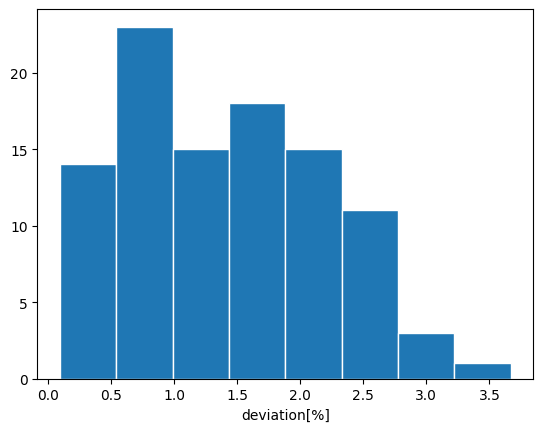

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

persent_data = []
for data in att48_results:
  mistake = data/10628 *100 -100
  persent_data.append(mistake)
# グラフの描画
print(persent_data)
plt.hist(persent_data,bins = "auto",rwidth = 1,edgecolor="white")
plt.xlabel("deviation[%]")
plt.show()

In [ ]:
trial_num = 30
for i in range(trial_num):
  results = tsp_solve(towns_filename = "att48",distance_mesure = att_distance,ideal_route=27686,move_method = "2-opt",initial_method= "greedy",grid = "off")
  tsp_save(results,'tsp_results')

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Tempe

In [ ]:
tsp_save(results,'tsp_results')

NameError: ignored

In [ ]:
    # town -> 0 Long->1 Lati ->2
towns_filename = "att48.opt.tour"
towns_data = pd.read_csv('/content/drive/My Drive/colab/'+towns_filename, header=5,dtype={'Longitude': float, 'Latitude': float})
"""df = towns_data['NODE_COORD_SECTION'].str.split(' ', expand=True)

towns_data = df.rename(columns={0: 'Town',1: 'Longitude',2: 'Latitude'})
gyo = len(towns_data)

towns_data = towns_data.astype({'Latitude': float,"Longitude":float})
towns_data"""
towns_data

,1
0,8
1,38
2,31
3,44
4,18
5,7
6,28
7,6
8,37
9,19


In [ ]:
import cProfile

In [ ]:
cProfile.run('results = tsp_solve(towns_filename = "att48",distance_mesure = att_distance,ideal_route=27686,move_method = "2-opt",initial_method= "greedy",grid = "off")')

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 Temperature        Energy    Accept   Improve     Elapsed   Remaining


         20189688 function calls (17500179 primitive calls) in 14.992 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(all)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(argsort)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(array_equal)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_1d)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(atleast_2d)
        3    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(concatenate)
       20    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(copyto)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:177(vstack)
       22    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1053(_handle_fr